In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
dfdata = pd.read_csv('/content/drive/MyDrive/TH1391_NLMH/NLMH_OnkiemTra/Chap3_ML_ANN/pima-indians-diabetes.csv')
dfdata.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
X = dfdata.iloc[:, :-1].values
y = dfdata.iloc[:, -1:].values

In [5]:
X[:5]

array([[1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01],
       [5.000e+00, 1.160e+02, 7.400e+01, 0.000e+00, 0.000e+00, 2.560e+01,
        2.010e-01, 3.000e+01]])

In [6]:
y[:5]

array([[0],
       [1],
       [0],
       [1],
       [0]])

In [7]:
# Tách dữ liệu làm train và test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# Chuẩn hóa đặt trưng
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Xây dựng ANN và huấn luyện
from keras.models import Sequential
from keras.layers import Input, Dense

# khởi tạo mô hình Sequential
classifier = Sequential()

# Thêm lớp Input
classifier.add(Input(shape=(8,)))

# Thêm lớp Dense
# classifier.add(Dense(12, input_dim=input_shape, activation='relu'))
input_shape=11
classifier.add(Dense(12, input_dim=input_shape, activation='relu'))

# Thêm lớp Dense
classifier.add(Dense(8, activation='relu'))

# Thêm lớp Dense
classifier.add(Dense(1, activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# hiển thị cấu trúc mô hình - Ok
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 150, verbose=0)

In [11]:
# Hiển thị độ chính xác mô hình - Ok
loss, accuracy = classifier.evaluate(X_train, y_train, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 81.08


5/5 [==============================] - 0s 3ms/step
(154, 1)
5/5 [==============================] - 0s 3ms/step


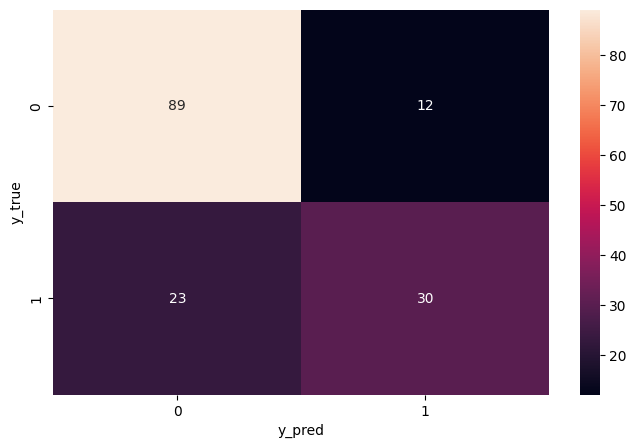

In [18]:
y_pred = classifier.predict(X_test)
print(y_pred.shape)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [19]:
# Hiểm thị 5 dòng dữ liệu đầu tiên - Ok
y_pred = (y_pred > 0.5)
for i in range(min(5, len(y_pred))):
    print('%s => %d (expected %d)' % (X_test[i].tolist(), y_pred[i], y_test[i]))

[1.256641252031236, 1.4299213040531, 1.8728411179843973, 1.6273165643608904, 1.3420678097220775, 0.7052641164808465, -0.9023164162403692, 0.8399709932785513] => 1 (expected 1)
[0.36403280765678914, 0.3362751619434729, 0.5578342129033221, -1.3083287866626134, -0.6907805409232168, -0.6750736582338089, -0.8415905657700471, 3.0712139417574758] => 0 (expected 0)
[0.9591051039064206, 1.2111920756311747, -0.7571726921777531, 0.7338592836146066, 0.8492560883535212, -0.20218016134082528, 0.3208757146618317, 0.4967028473587167] => 1 (expected 1)
[0.9591051039064206, -0.6636298822710435, -3.4883408796538324, -1.3083287866626134, -0.6907805409232168, -0.26608468794798523, 0.020138169475474994, -0.10401640800099375] => 0 (expected 1)
[-0.528575636717658, 0.023804835626436534, -0.45370956023596654, -0.15959799713167716, 0.2420416459529788, -0.2916464985908491, 0.6939059389795241, -0.9621867728005802] => 0 (expected 0)


In [20]:
!pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=9e5313470f8964f58ffd1c3debc769ad579ecc1068e7742bd4886f6f770ea1ab
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


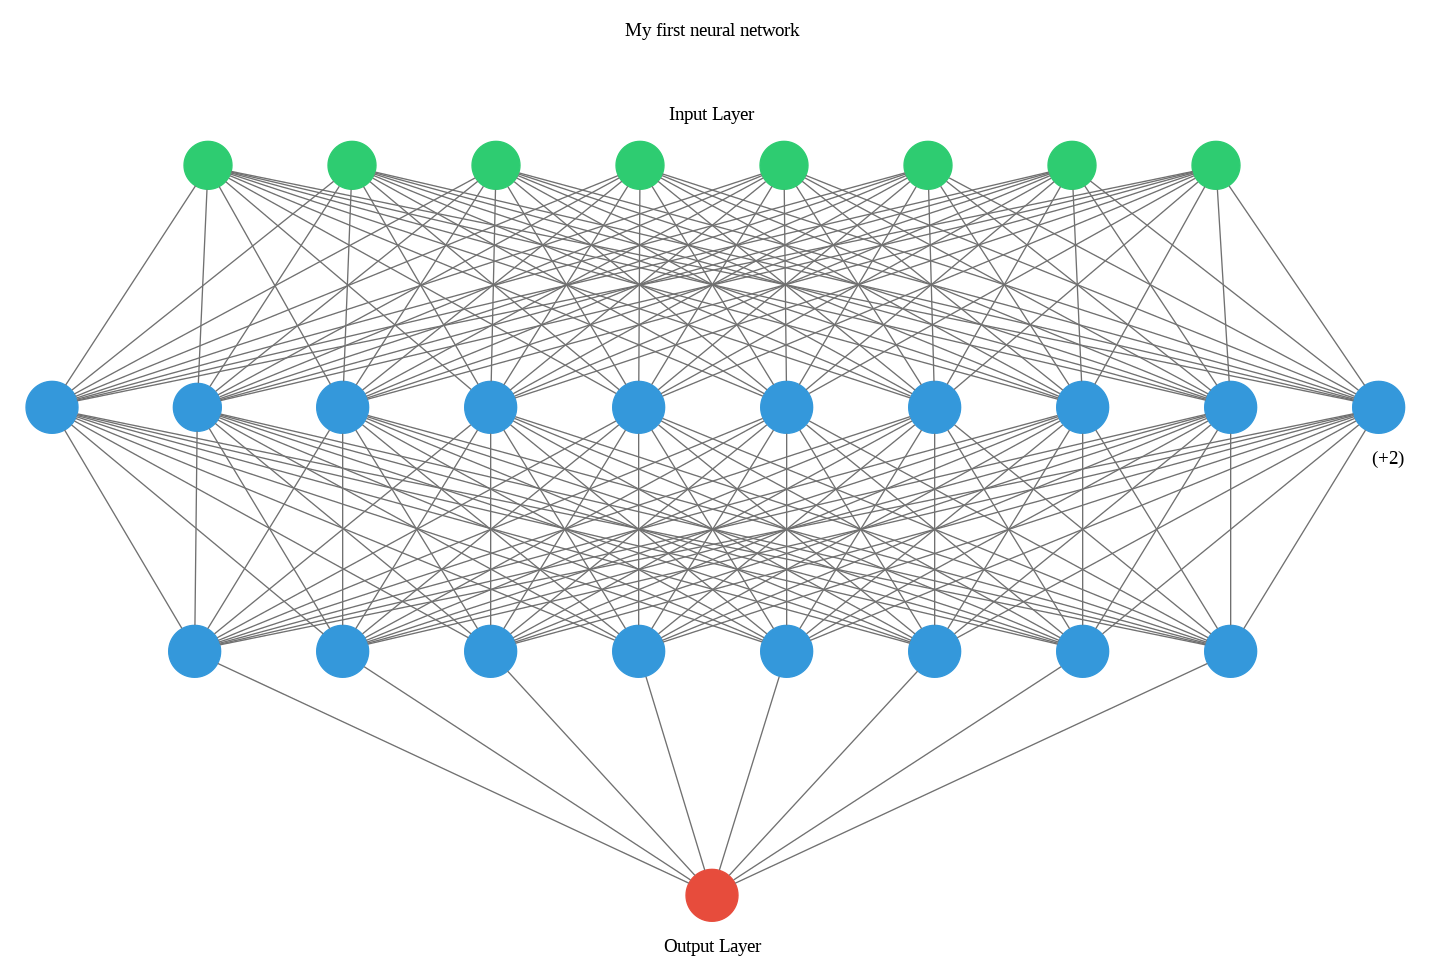

In [22]:
from ann_visualizer.visualize import ann_viz;
import pydot
import graphviz
from IPython.display import Image

ann_viz(classifier, view=True, filename="Img_NetWork_Baitap3.gv", title="My first neural network")

# Convert .dot file to .png file
(graph,) = pydot.graph_from_dot_file('Img_NetWork_Baitap2.gv')
graph.write_png('Img_NetWork_Baitap3.png')

# Display the image in Jupyter notebook
Image(filename='Img_NetWork_Baitap3.png')